# Assignment 3
This assignment deals with using `textblob` and other open-source libraries to perform NLP-based analysis on documents using Python.  **All parts should use the same three documents (as outlined in Part 1 below).  In addition to your .ipynb and/or .py files, you must submit the three documents in .txt format, as well as a report document in .txt/.pdf format that answers various questions below.  It is not necessary to submit the .csv file for Part 3, since we will be executing your code.  _Just make sure it works correctly!_**  

**Part 1:**<br> Select and download three texts of your choosing that represent different media or writing formats (for example, you could choose i. a novel, movie script, and play script or ii. a short story, poem, and novel, etc.)
**Make sure you briefly descibe your documents and explain the difference between them in a paragraph.** 

**Part 2:**<br>
(a) Compute word counts for each of your documents after excluding English stop words (and optionally, performing lemmatization and/or other preprocessing that you would like to employ).<br>
(b) Create and display a bar plot for each document that include word counts for the 25 most frequent words (after the above processing).<br>
(c) Create and display a word cloud for each document (using a mask image of your choice) that includes only the 100 most frequent words.  Note that you'll likely want to use the approach outlined in Session 25 that utilizes the `fitwords` method, since you will want data consistent with those for part (b).<br>(d) Do you see any notable difference between the documents wrt (b) and/or (c) above?  Try to explain why or why not, and whether or not these results are expected.<br>

**Part 3:**<br>
(a) Using your approach from **Part 2**, compute the 25 most _cumulatively commmon_ words across the three documents, along with the _cumulative counts_.  Remember that a given word can appear in 2 or even all 3 documents.  <br>
Ex: if the word "spider" appears 10 times in document 1, 6 times in document 2, and 5 times in document 3, its cumulative count will be 21.<br>
(b) Create a CSV file named **MCW.csv** with the following specifications:
i. The csv file should use the standard delimiter (,) <br> 
ii. The first row in the file should be a column header row denoted by the string "Word,Count" <br>
iii. The next 25 rows should be populated with the pairs of the 25 most cumulatively common words and counts, in descending order by count. <br>
iv. One final row should added of the form "Sum,(totalcount)" where (totalcount) represents the sum of the top 25 cumulative counts.<br>
A sample csv file is included to give you an idea of what to generate in practice.<br><br>
**Part 4:**<br>
(a) Use **Textatistic** to compute the _average_ of the Flesch–Kincaid, Gunning Fog, SMOG, and Dale–Chall scores for each document.   
(b) Are there noticeable differences among your documents's readability scores, and would you expect these differences (or lack of differences, if there are none) to be present among documents were you judging their readability manually?

**Part 5:**<br> 
(a) Use spaCy to compute the pairwise similarity between your documents (i.e. doc. 1 to doc. 2, doc. 1 to doc. 3, doc. 2 to doc. 3).<br>
(b) Do any of these similarity scores seem higher or lower than you would expect?  Explain your response.




Part 1 Solution:
For the three documents I chose to represent a novel, movie script, and a poem. For the novel I used “The Young Castellan: A Tale of the English Civil War by George Manville Fenn”, chosen because I had already used it for homework 2. Thus I had the document available and preprocessed for this assignment. The novel is a long historical piece written contemporary to the English Civil War. For the movie script I chose the Bee Movie, because txt files of the script is readably available online with special characters removed. Finally for the poem I downloaded Respite by Elane Kim, which is a short modern poem. 

In [1]:
#Set provided in homework 2
stop_words = [" ", "\n", "\t", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "A", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appreciate", "approximately", "ar", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "been", "before", "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "ci", "cit", "cj", "cl", "clearly", "cm", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", "course", "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "G", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "H", "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", "haven", "having", "he", "hed", "hello", "help", "hence", "here", "his","her","him","she","they","them","hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", "http", "hu", "hundred", "hy", "i2", "i3", "i4", "i6", "i7", "i8", "i","ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", "jj", "jr", "js", "jt", "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using", "usually", "ut", "v", "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "wi", "widely", "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "Y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"]

In [2]:
#Part 2A, repeated from HW2
import string
novel_path = 'txt files/The Young Castellan: A Tale of the English Civil War by George Manville Fenn.txt'

with open(novel_path, 'r') as file:
    special_character_filter = str.maketrans("", "", string.punctuation)
    txt = [word.translate(special_character_filter).strip().lower() for line in file for word in line.split()]

import pandas as pd
i = 0
j = 0
found = False
uniqueWordCount = 0
words = []
count = []

while(i<len(txt)):
    j = 0
    found = False
    #Has this word already been seen
    while((j < len(words)) and (found == False)):
        if(txt[i] == words[j]):
            count[j] = count[j] + 1
            found = True
        j += 1
    #If not, create a new index for it
    if(found == False):
        words.append(txt[i])
        count.append(1)
        uniqueWordCount += 1
    i += 1

# Create a DataFrame from the lists
word_counts = pd.DataFrame({'Word': words, 'Count': count})

df_filtered = word_counts[~word_counts['Word'].isin(stop_words)]
novel_filtered = df_filtered.sort_values(by='Count', ascending=False)

#Filters out about 400 entires
print(novel_filtered.head(25))


        Word  Count
14       roy    310
29       sir    288
24       ben    166
89      dont    114
43       boy    109
6        see    102
13    master     98
208    cried     79
729   mother     79
96       man     78
444     know     69
406     will     68
161   father     59
227     want     58
536    sword     53
145    place     53
929     lady     50
215      ill     48
258      men     47
123     good     45
399     time     44
300  royland     43
424  soldier     40
694  himself     40
557   pawson     39


In [3]:
#Problem 2A, bee movie script
import string
script_path = 'txt files/Bee Movie.txt' #For some reason has a special whitespace character that doesnt get filtered out

with open(script_path, 'r') as file:
    special_character_filter = str.maketrans("", "", string.punctuation)
    txt = [word.translate(special_character_filter).strip().lower() for line in file for word in line.split()]

import pandas as pd
i = 0
j = 0
found = False
uniqueWordCount = 0
words = []
count = []

while(i<len(txt)):
    j = 0
    found = False
    #Has this word already been seen
    while((j < len(words)) and (found == False)):
        if(txt[i] == words[j]):
            count[j] = count[j] + 1
            found = True
        j += 1
    #If not, create a new index for it
    if(found == False):
        words.append(txt[i])
        count.append(1)
        uniqueWordCount += 1
    i += 1

# Create a DataFrame from the lists
word_counts = pd.DataFrame({'Word': words, 'Count': count})

df_filtered = word_counts[~word_counts['Word'].isin(stop_words)]
script_filtered = df_filtered.sort_values(by='Count', ascending=False)

print(script_filtered.head(25))


          Word  Count
56                324
12         bee     87
34        dont     64
33        bees     58
228       know     53
48       barry     50
237      honey     49
146       yeah     28
449   thinking     27
377        see     26
232       life     24
611    flowers     23
506       want     19
206       will     19
347    talking     19
236       work     19
74        good     18
691       time     18
240     pollen     17
37      humans     16
555      roses     16
738    vanessa     15
1149    benson     15
16         fly     15
599       buzz     13


In [4]:
#Problem 2A, poem
import string
poem_path = 'txt files/Respite.txt'

with open(poem_path, 'r') as file:
    special_character_filter = str.maketrans("", "", string.punctuation)
    txt = [word.translate(special_character_filter).strip().lower() for line in file for word in line.split()]

import pandas as pd
i = 0
j = 0
found = False
uniqueWordCount = 0
words = []
count = []

while(i<len(txt)):
    j = 0
    found = False
    #Has this word already been seen
    while((j < len(words)) and (found == False)):
        if(txt[i] == words[j]):
            count[j] = count[j] + 1
            found = True
        j += 1
    #If not, create a new index for it
    if(found == False):
        words.append(txt[i])
        count.append(1)
        uniqueWordCount += 1
    i += 1

# Create a DataFrame from the lists
word_counts = pd.DataFrame({'Word': words, 'Count': count})

df_filtered = word_counts[~word_counts['Word'].isin(stop_words)]
poem_filtered = df_filtered.sort_values(by='Count', ascending=False)

print(poem_filtered.head(25))

            Word  Count
0           it’s      2
2         year’s      2
38        bodies      2
28      sardines      2
57      generous      2
96        static      1
93        places      1
92          list      1
91        making      1
89     listening      1
88          died      1
87           day      1
86      birthday      1
84       confuse      1
82       funeral      1
81   anniversary      1
80          week      1
78   supermarket      1
76          cake      1
75         pound      1
74         round      1
72       cicadas      1
95         visit      1
128         feed      1
122      bellies      1


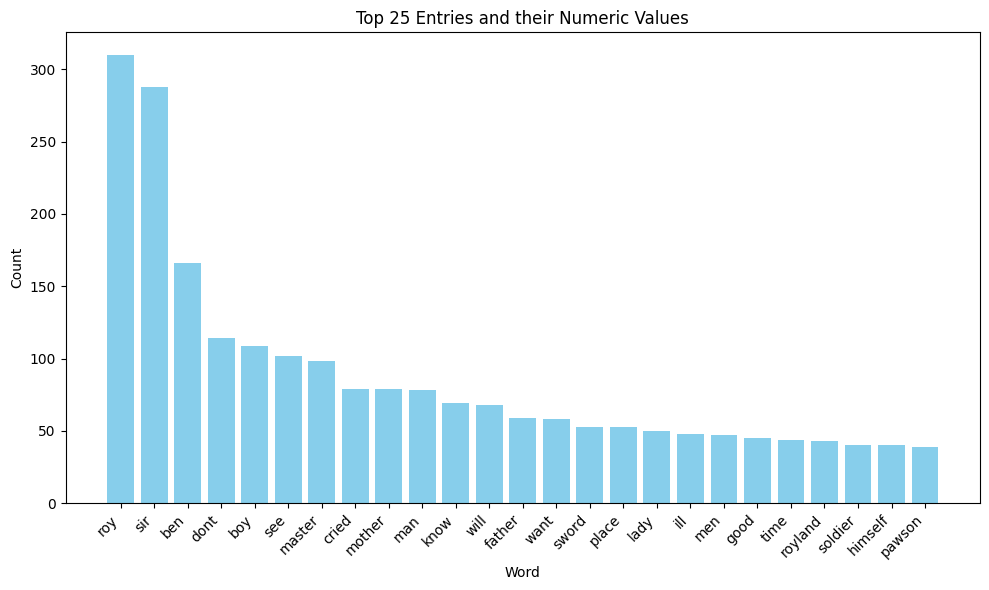

In [5]:
import matplotlib.pyplot as plt

novelPlot = novel_filtered.nlargest(25, 'Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(novelPlot['Word'], novelPlot['Count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 25 Entries and their Numeric Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

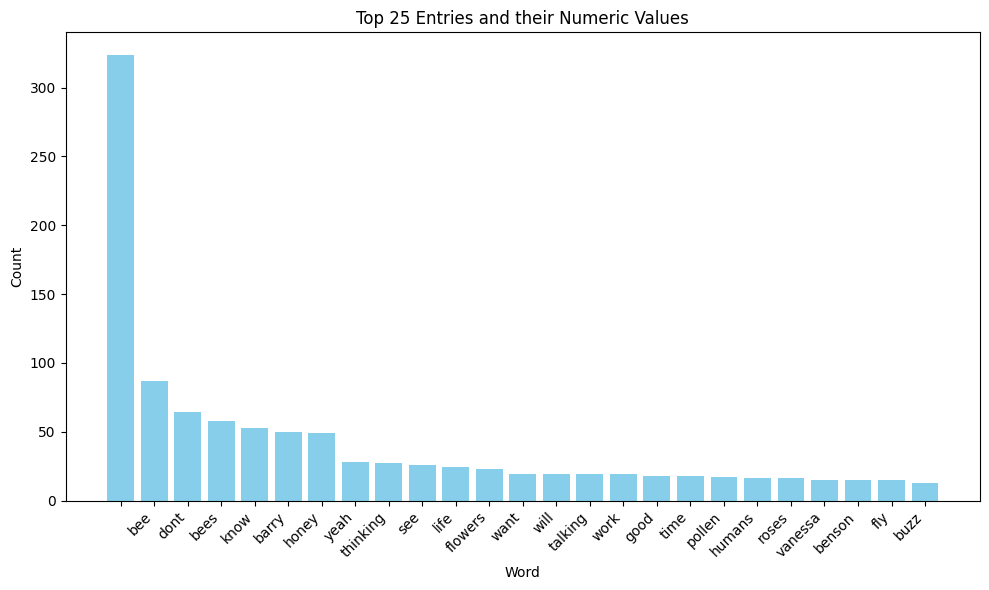

In [6]:
scriptPlot = script_filtered.nlargest(25, 'Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(scriptPlot['Word'], scriptPlot['Count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 25 Entries and their Numeric Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

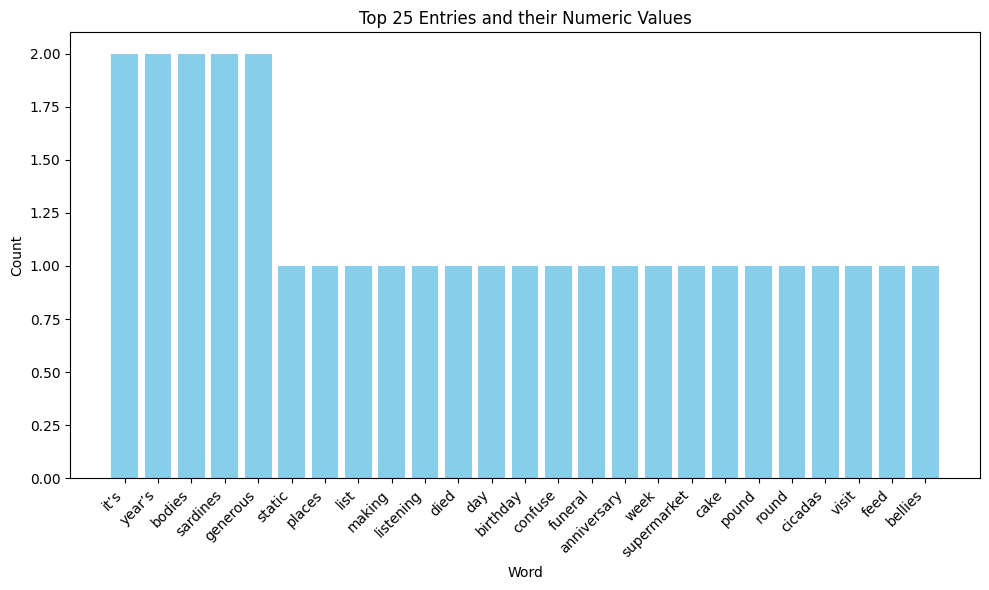

In [7]:
poemPlot = poem_filtered.nlargest(25, 'Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(poemPlot['Word'], poemPlot['Count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 25 Entries and their Numeric Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

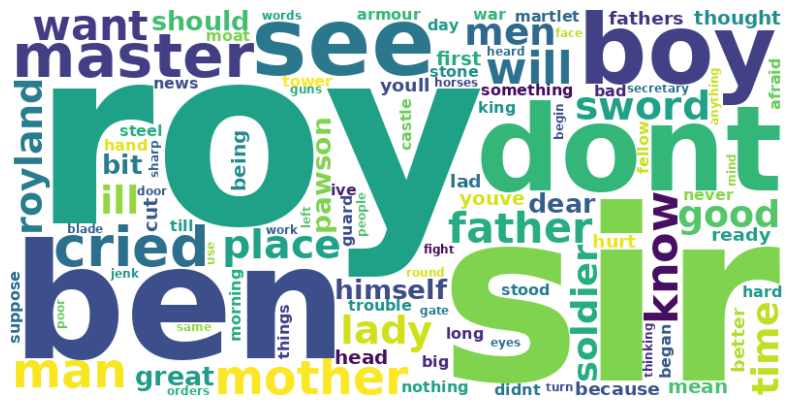

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

first_25_rows = novel_filtered.head(100)

# Create a dictionary from the DataFrame columns
word_count_dict = dict(zip(first_25_rows['Word'], first_25_rows['Count']))

# Generate the word cloud using a default font available on most Linux systems
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path="/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf").generate_from_frequencies(word_count_dict)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


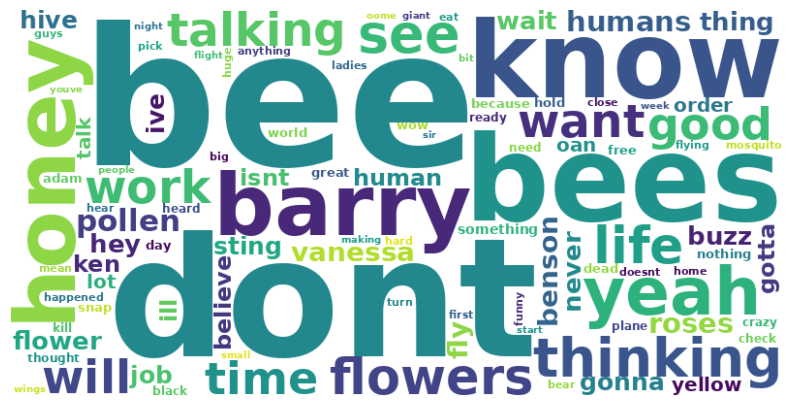

In [9]:
first_25_rows = script_filtered.head(100)

# Create a dictionary from the DataFrame columns
word_count_dict = dict(zip(first_25_rows['Word'], first_25_rows['Count']))

# Generate the word cloud using a default font available on most Linux systems
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path="/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf").generate_from_frequencies(word_count_dict)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

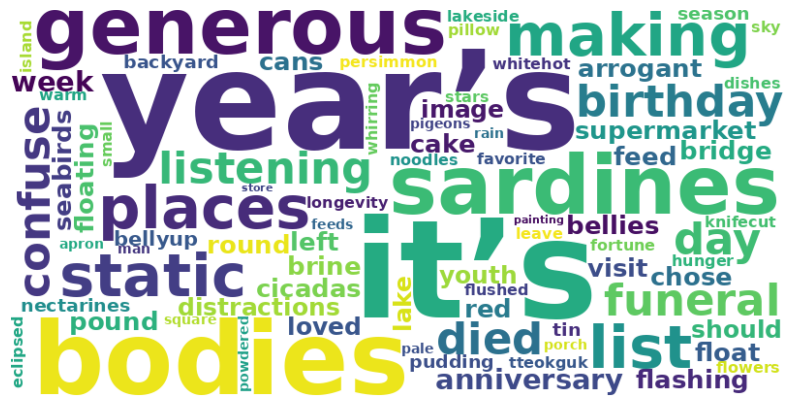

In [10]:
first_25_rows = poem_filtered.head(100)

# Create a dictionary from the DataFrame columns
word_count_dict = dict(zip(first_25_rows['Word'], first_25_rows['Count']))

# Generate the word cloud using a default font available on most Linux systems
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path="/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf").generate_from_frequencies(word_count_dict)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

There are the obvious differences between the results in parts B and C, as they are entirely different displays with even different datasets (top 25 vs top 100 rows used). There are more simularities than differences though. Both present the documents and show the prevalence of certain words over others.

Problem 3:

In [11]:
import string

# Paths to the three text files
file_paths = ['txt files/The Young Castellan: A Tale of the English Civil War by George Manville Fenn.txt', 'txt files/Bee Movie.txt', 'txt files/Respite.txt']

# Initialize an empty list to store words from all files
txt = []

# Iterate over each file path
for file_path in file_paths:
    with open(file_path, 'r') as file:
        # Apply the special character filter and lowercasing to each word in the file
        special_character_filter = str.maketrans("", "", string.punctuation)
        words = [word.translate(special_character_filter).strip().lower() for line in file for word in line.split()]
        
        # Extend the list of words with the words from the current file
        txt.extend(words)

import pandas as pd
i = 0
j = 0
found = False
uniqueWordCount = 0
words = []
count = []

while(i<len(txt)):
    j = 0
    found = False
    #Has this word already been seen
    while((j < len(words)) and (found == False)):
        if(txt[i] == words[j]):
            count[j] = count[j] + 1
            found = True
        j += 1
    #If not, create a new index for it
    if(found == False):
        words.append(txt[i])
        count.append(1)
        uniqueWordCount += 1
    i += 1

# Create a DataFrame from the lists
word_counts = pd.DataFrame({'Word': words, 'Count': count})

df_filtered = word_counts[~word_counts['Word'].isin(stop_words)]
total_filtered = df_filtered.sort_values(by='Count', ascending=False)

#Filters out about 400 entires
print(total_filtered.head(25))


        Word  Count
3390            324
14       roy    310
29       sir    294
89      dont    178
24       ben    166
6        see    128
444     know    122
43       boy    114
13    master     98
3382     bee     87
406     will     87
96       man     83
729   mother     79
208    cried     79
227     want     77
123     good     63
399     time     62
161   father     60
215      ill     59
3384    bees     58
145    place     56
536    sword     54
3387   barry     50
929     lady     50
3460   honey     49


In [12]:
# Create a DataFrame containing the first 25 rows
csv_values = total_filtered.head(25)

# Calculate the sum of counts in the first 25 rows
total_count = csv_values['Count'].sum()

# Append the sum as a new row to the DataFrame
sum_row = pd.DataFrame({'Word': ['Sum'], 'Count': [total_count]})
csv_total = pd.concat([csv_values, sum_row])

# Define the path where you want to save the CSV file
csv_file_path = 'MCW.csv'

# Write the DataFrame to a CSV file
csv_total.to_csv(csv_file_path, index=False)

# Print confirmation
print(csv_total)



        Word  Count
3390            324
14       roy    310
29       sir    294
89      dont    178
24       ben    166
6        see    128
444     know    122
43       boy    114
13    master     98
3382     bee     87
406     will     87
96       man     83
729   mother     79
208    cried     79
227     want     77
123     good     63
399     time     62
161   father     60
215      ill     59
3384    bees     58
145    place     56
536    sword     54
3387   barry     50
929     lady     50
3460   honey     49
0        Sum   2787


Problem 4:
For each document take all 4 scores and average the results

In [13]:
from textatistic import Textatistic

with open('txt files/The Young Castellan: A Tale of the English Civil War by George Manville Fenn.txt', 'r') as file:
    text = file.read()
    # Calculate scores using Textatistic
    text_stats = Textatistic(text)
    print("The Young Castellan average score: ", ((text_stats.flesch_score + text_stats.gunningfog_score + text_stats.smog_score + text_stats.dalechall_score)/4))

with open('txt files/Bee Movie.txt', 'r') as file:
    text = file.read()
    # Calculate scores using Textatistic
    text_stats = Textatistic(text)
    print("The Bee Movie average score: ", ((text_stats.flesch_score + text_stats.gunningfog_score + text_stats.smog_score + text_stats.dalechall_score)/4))

with open('txt files/Respite.txt', 'r') as file:
    text = file.read()
    # Calculate scores using Textatistic
    text_stats = Textatistic(text)
    print("Respite average score: ", ((text_stats.flesch_score + text_stats.gunningfog_score + text_stats.smog_score + text_stats.dalechall_score)/4))

The Young Castellan average score:  28.379142990353227
The Bee Movie average score:  29.14661664711574
Respite average score:  27.51009677830941


I am quite suprised by how simular the scores are. While I knew the Bee Movie would perform well, I am supprised that The Young Castellan is so close. I thought The Young Castellan is archaic and would score poorly for that reason. I am unsuprized that Respite had a low score, as poems tend to have a very unnatural speech pattern with flowery language. 

Problem 5: spaCy and pairwise simularity

In [14]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_md")

# Paths to the three text files
file_paths = ['txt files/The Young Castellan: A Tale of the English Civil War by George Manville Fenn.txt', 'txt files/Bee Movie.txt', 'txt files/Respite.txt']

# Read the contents of each document
documents = []
for file_path in file_paths:
    with open(file_path, 'r') as file:
        documents.append(file.read())

# Process the text using spaCy to obtain document embeddings
document_embeddings = [nlp(doc) for doc in documents]

# Compute pairwise similarities between embeddings
pairwise_similarities = []
for i in range(len(document_embeddings)):
    similarities = []
    for j in range(len(document_embeddings)):
        similarity = document_embeddings[i].similarity(document_embeddings[j])
        similarities.append(similarity)
    pairwise_similarities.append(similarities)

# Print the pairwise similarities
for i, similarity_row in enumerate(pairwise_similarities):
    print(f"Similarity scores for document {i+1}: {similarity_row}")



/home/danieltb/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Similarity scores for document 1: [1.0, 0.9123191636663011, 0.9174648481091794]
Similarity scores for document 2: [0.9123191636663011, 1.0, 0.8737788613023376]
Similarity scores for document 3: [0.9174648481091794, 0.8737788613023376, 1.0]


Based on the textastic scores I am not supprised that Bee Movie and Respite are so different as they have significantly different readability scores. The Young Castellan, with the middle readability score, is in between the two and thus highly simular to both. 